##  A Whale off the Port(folio)

In [167]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path



%matplotlib inline

In [168]:
# Data Cleaning/Files:
# 1. whale_returns.csv
# 2. algo_returns.csv
# 3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [169]:
# Reading whale returns
whale_returns_csv=Path("Resources/whale_returns.csv")
whale_returns=pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns=whale_returns.sort_index()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [170]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [171]:
# Drop nulls
whale_returns=whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [172]:
# Algorithmic Daily Returns
# Read the algorithmic daily returns and clean the data

In [173]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns=pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns=algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [174]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [175]:
# Drop nulls
algo_returns=algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [176]:
# S&P 500 Returns
# Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [177]:
# Reading S&P 500 Closing Prices
sp500_history_csv=Path("Resources/sp500_history.csv")
sp500_history=pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history=sp500_history.sort_index()
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [178]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [179]:
# Fix Data Types
sp500_history["Close"]=sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]=sp500_history["Close"].str.replace(",", "")
sp500_history["Close"]=sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [180]:
# Calculate Daily Returns
sp500_returns=sp500_history.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [181]:
# Drop nulls
sp500_returns=sp500_returns.dropna()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [182]:
# Rename Column
sp500_returns=sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [183]:
# Concatenate all DataFrames into a single DataFrame
combined_portfolios=pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_portfolios




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Portfolio Analysis

In [126]:
# Performance
# Calculate and Plot the daily returns and cumulative returns

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

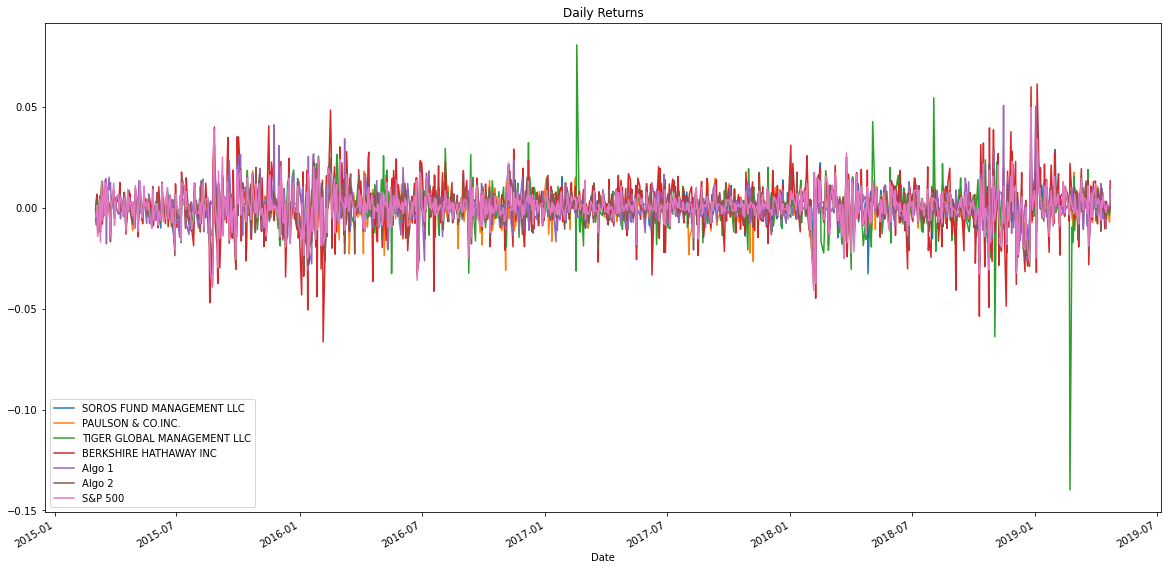

In [184]:
# Plot daily returns
combined_portfolios.plot(figsize=(20,10), title="Daily Returns")





<AxesSubplot:title={'center':'Combined Portfolio Cumulative Returns'}, xlabel='Date'>

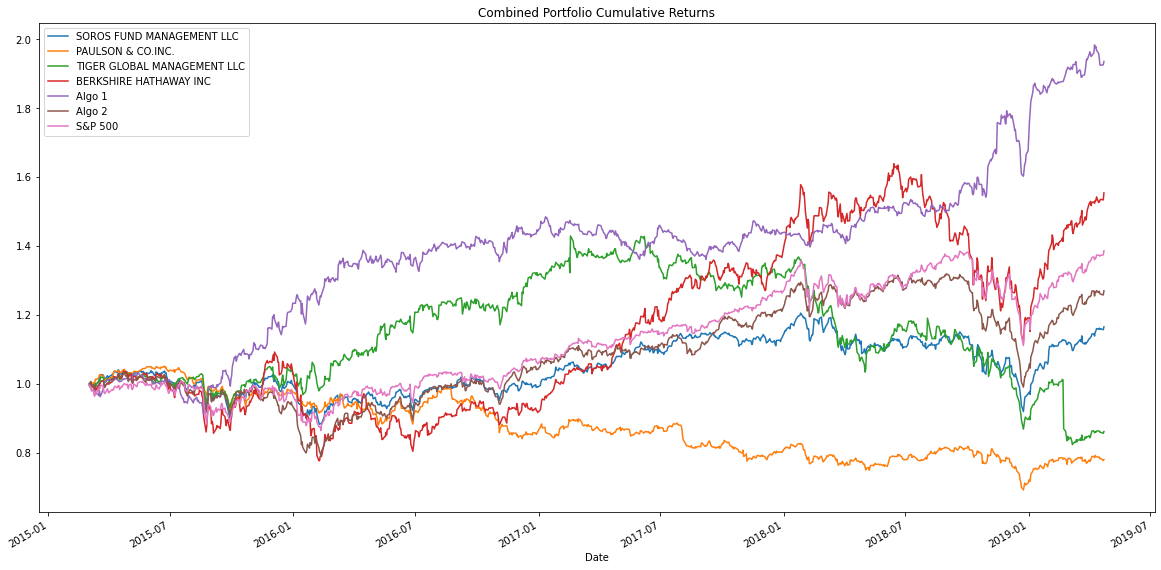

In [185]:
# Plot cumulative returns
cumulative_returns=(1+combined_portfolios).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Combined Portfolio Cumulative Returns")

In [129]:
# Risk/Determine the _risk_ of each portfolio:
# Create a box plot for each portfolio. 
# Calculate the standard deviation for all portfolios
# Determine which portfolios are riskier than the S&P 500
# Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Combined Portfolio Risk'}>

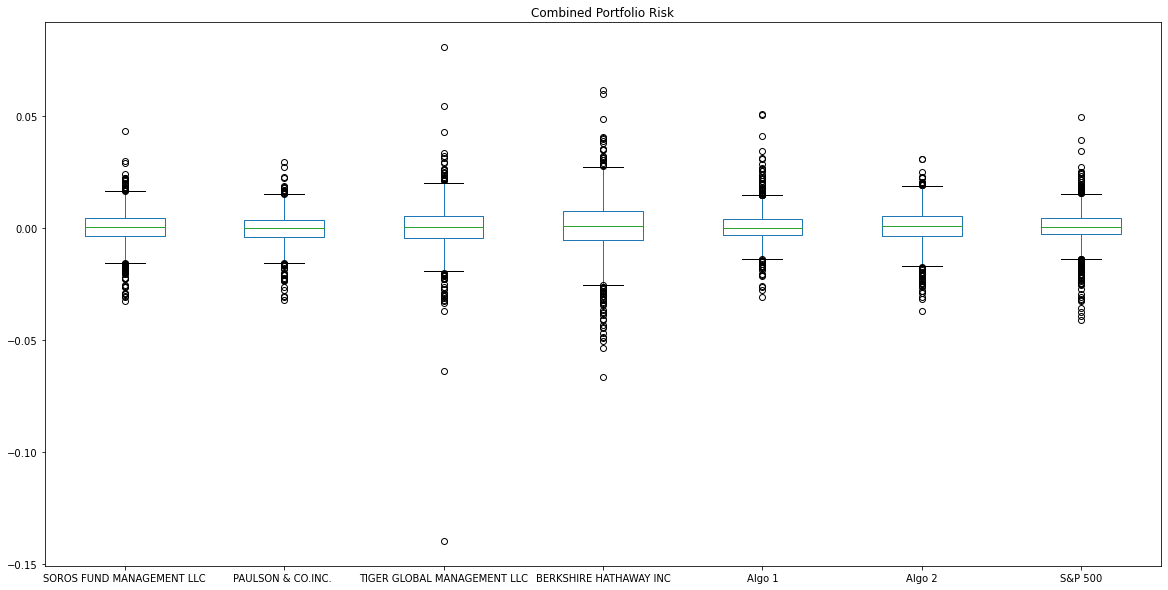

In [186]:
# Box plot to visually show risk
combined_portfolios.plot.box(figsize=(20,10), title="Combined Portfolio Risk")




In [187]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_portfolios.std()




SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [188]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk=combined_portfolios["S&P 500"].std()
combined_portfolios.std()>sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [189]:
# Calculate the annualized standard deviation (252 trading days)
Annual_std=combined_portfolios.std()*np.sqrt(252)
Annual_std




SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

In [190]:
# Rolling Statistics/Analyze the rolling statistics for Risk and Beta

# Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window)
# Construct a correlation table for the algorithmic, whale, and S&P 500 returns
# Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns
# Alternative way to calculate-exponentially weighted moving average(ewm with a 21 day half-life)

<AxesSubplot:title={'center':'21-Days Rolling Standard Deviation'}, xlabel='Date'>

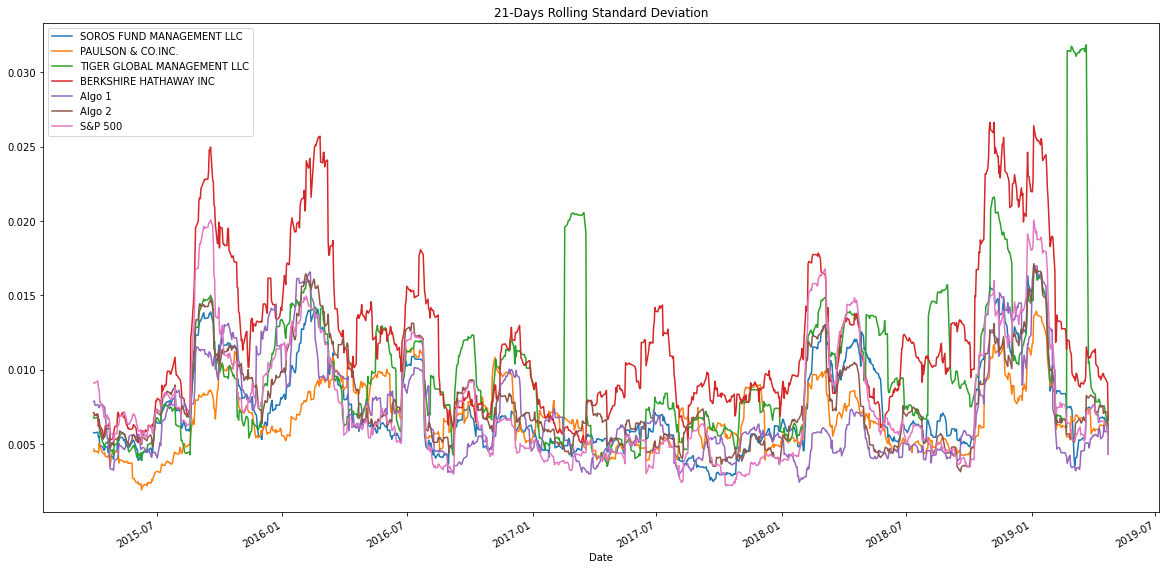

In [191]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_roll_std=combined_portfolios.rolling(window=21).std()
combined_portfolios_roll_std.plot(figsize=(20,10),title="21-Days Rolling Standard Deviation")



In [192]:
# Construct a correlation table
corr_table=combined_portfolios.corr()
corr_table
corr_table.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Berkshire Hathaway V. S&P500 Beta'}, xlabel='Date'>

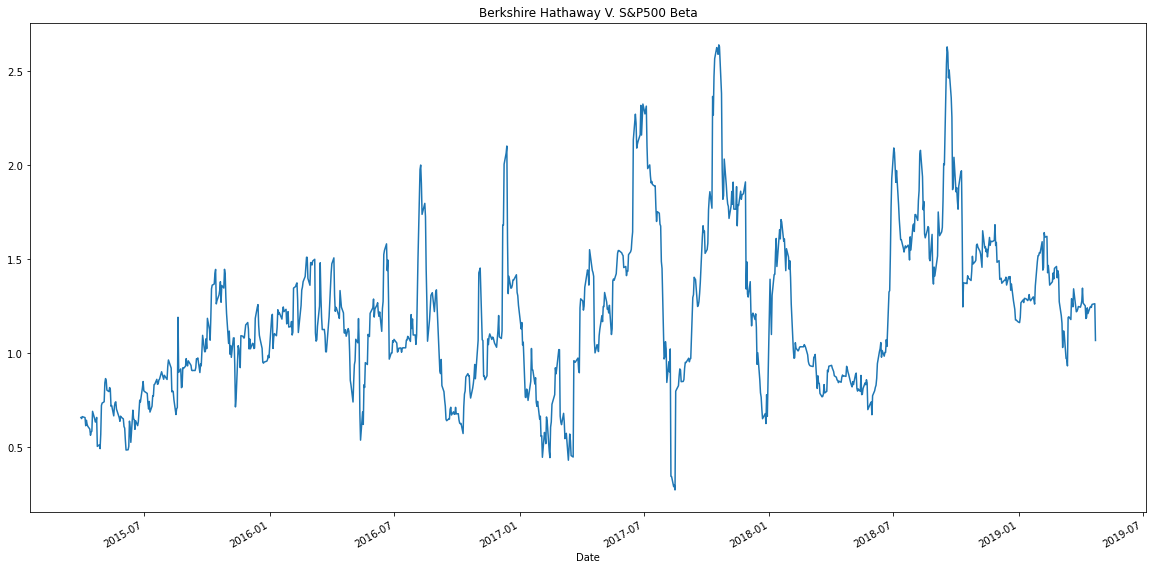

In [197]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance=combined_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=21).cov(combined_portfolios["S&P 500"])
variance=combined_portfolios["S&P 500"].rolling(21).var()
beta=covariance/variance
beta.plot(figsize=(20, 10), title="Berkshire Hathaway V. S&P500 Beta")

In [198]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_portfolios_ewm=combined_portfolios.ewm(halflife=21).std()
combined_portfolios_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


<AxesSubplot:title={'center':'Combined Portfolios EWM'}, xlabel='Date'>

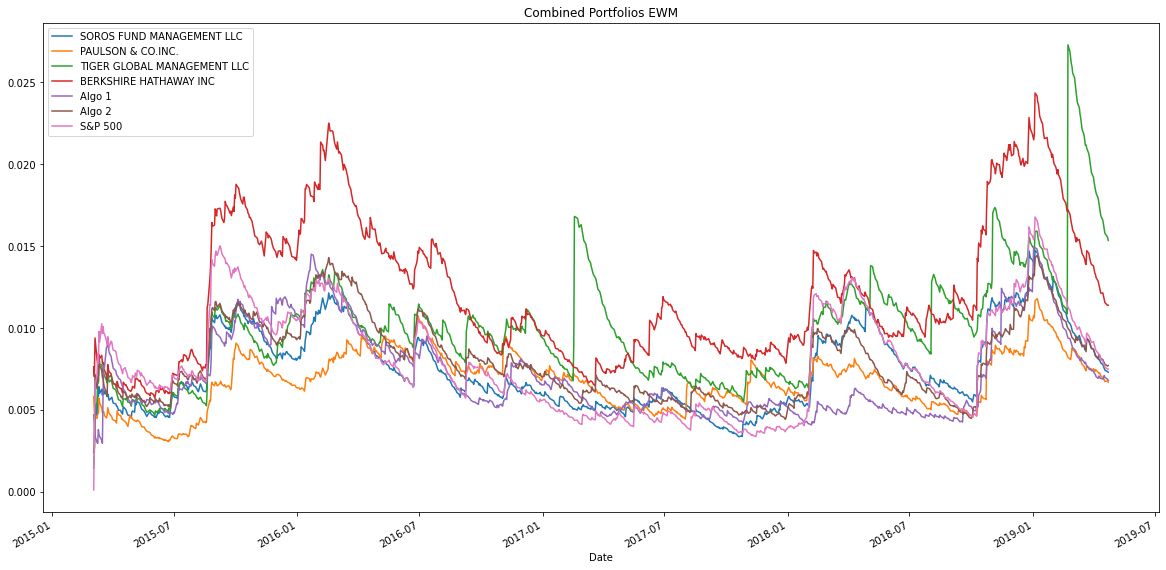

In [199]:
combined_portfolios_ewm.plot(figsize=(20,10), title="Combined Portfolios EWM")

---

In [140]:
# Sharpe Ratios/Calculate and visualize the Sharpe ratios using a bar plot
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios

In [200]:
# Calculate annualized Sharpe Ratios
Sharpe_ratios=(combined_portfolios.mean()*252)/(combined_portfolios.std()*np.sqrt(252))
Sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

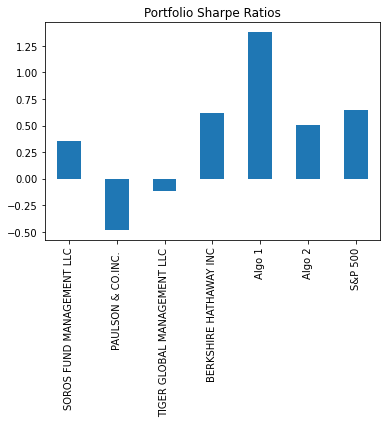

In [201]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Algo 1 but not Algo 2 outperform both "the market" as represented by S&P 500 and the whales.

---

## Portfolio Returns/Your analysis should include:



- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table
- Using your custom portfolio and one other of your choosing:
 - The plotted beta -->

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [202]:
# Read the first stock
google_csv=Path("Resources/goog_historical.csv")
google_historical=pd.read_csv(google_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical=google_historical.sort_index()
google_historical





,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [203]:
# Read the second stock
apple_csv=Path("Resources/aapl_historical.csv")
apple_historical=pd.read_csv(apple_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical=apple_historical.sort_index()
apple_historical




,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [204]:
# Read the third stock
costco_csv=Path("Resources/cost_historical.csv")
costco_historical=pd.read_csv(costco_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical=costco_historical.sort_index()
costco_historical




,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [205]:
# Concatenate all stocks into a single DataFrame
All_stocks=pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
All_stocks

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [206]:
# Reset the index
All_stocks=All_stocks.reset_index()
All_stocks

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [207]:
# Pivot so that each column of prices represents a unique symbol
portfolio=All_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio





Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [208]:
# Drop Nulls
portfolio_daily_returns=portfolio.pct_change()
portfolio_daily_returns=portfolio_daily_returns.dropna()
portfolio_daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [209]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns=portfolio_daily_returns.dot(weights)
weighted_returns




Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [210]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolios["Custom"]=weighted_returns
combined_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


In [211]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios=combined_portfolios.dropna().copy()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [212]:
# Risk (Annaulized Standard Deviation)
Annaulized_risk=combined_portfolios.std()*np.sqrt(252)
Annaulized_risk

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

<AxesSubplot:title={'center':'All Portfolios Rolling Standard Deviation'}, xlabel='Date'>

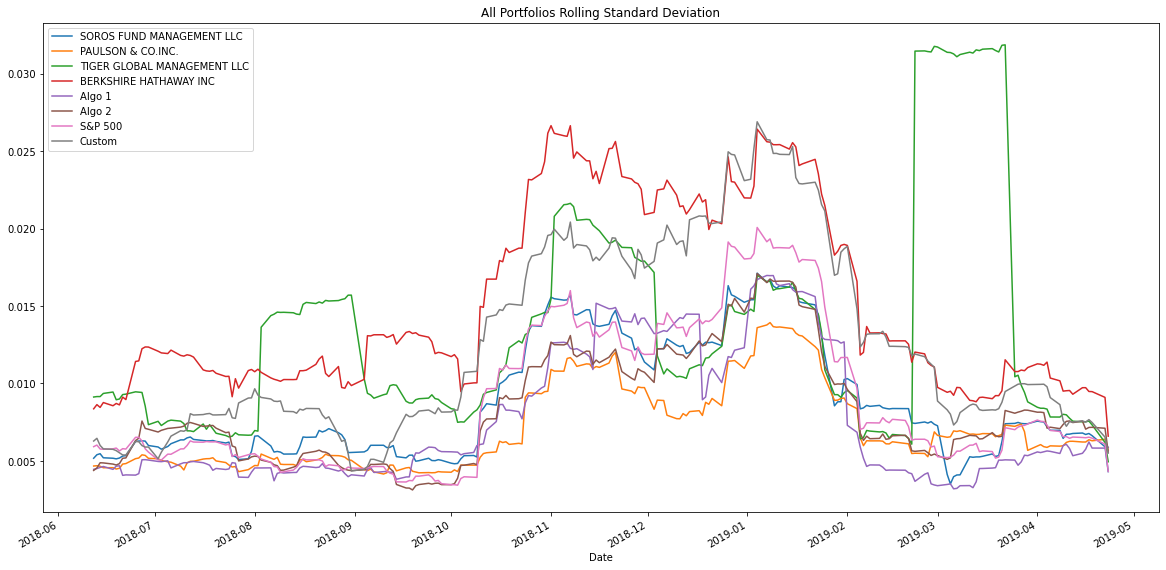

In [213]:
# Rolling
Rolling_std=combined_portfolios.rolling(window=21).std()
Rolling_std.plot(figsize=(20,10), title="All Portfolios Rolling Standard Deviation")

In [214]:
# Annualized Sharpe Ratios
Annual_sharpe_ratios=(combined_portfolios.mean()*252)/(combined_portfolios.std()*np.sqrt(252))
Annual_sharpe_ratios





SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

<AxesSubplot:title={'center':'Portfolios Annualized Sharpe Ratios'}>

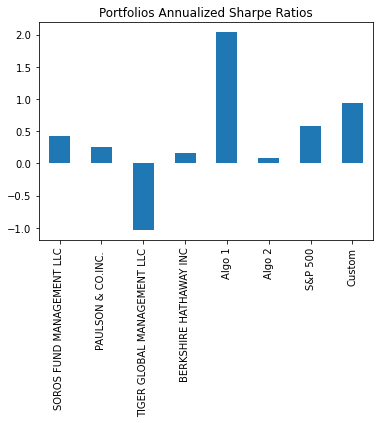

In [215]:
# Visualize the sharpe ratios as a bar plot
Annual_sharpe_ratios.plot(kind="bar", title="Portfolios Annualized Sharpe Ratios")

In [216]:
# Create a correlation analysis
combined_corr=combined_portfolios.corr()
combined_corr.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:title={'center':'Custom Portfolio V. S&P500 Beta'}, xlabel='Date'>

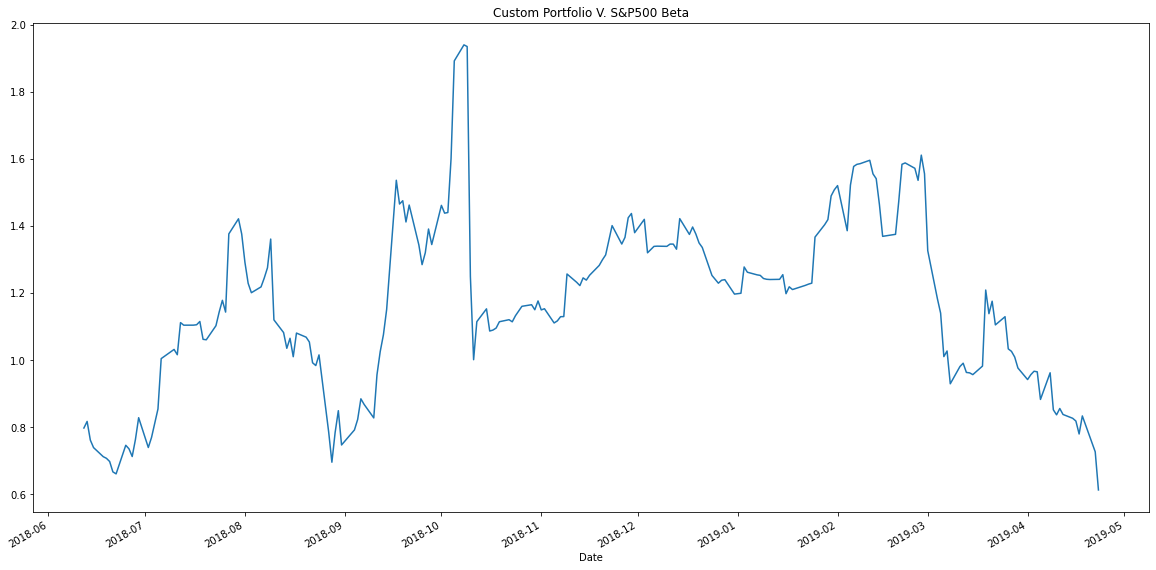

In [217]:
# Beta



covariance=combined_portfolios["Custom"].rolling(window=21).cov(combined_portfolios["S&P 500"])
variance=combined_portfolios["S&P 500"].rolling(21).var()
beta=covariance / variance
beta.plot(figsize=(20,10), title="Custom Portfolio V. S&P500 Beta")